In [18]:
# import all dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image, SVG
%matplotlib inline

import warnings; warnings.filterwarnings('ignore')

In [17]:
# Keras specific dependencies
from keras.models import Sequential
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.datasets import mnist

Training set shape: (60000, 28, 28)
First image:


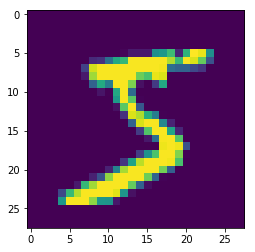

In [3]:
# for reproducibility
np.random.seed(123)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preview Data
print('Training set shape:', X_train.shape)
print('First image:')
plt.imshow(X_train[0])

In [4]:
# Preprocess Input data

# reshape data
X_train =  X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# save reference to shape
input_shape = X_train.shape[1:]
print('New shape:', input_shape)

# convert our data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize data to range [0, 1]
X_train /= 255
X_test /= 255

New shape: (1, 28, 28)


In [6]:
# Preprocess label data

# Convert the class labels to one-hot encoded arrays
num_classes = 10
# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)

# print new shape
print('New label shape:', y_train.shape)

New label shape: (60000, 10)


In [7]:
# Define CNN Architecture

#declare a sequential model
model = Sequential()

# declare the input layer
model.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_first', input_shape=input_shape))

# confirm output shape
print(model.output_shape)

(None, 32, 26, 26)


In [8]:
# adding more layers to our model
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatter the output to a 1D array of values
model.add(Flatten())

# add a Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add the final software layer
model.add(Dense(10, activation='softmax'))

In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 24, 32)        7520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               737408    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
# train model
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 240s 4ms/step - loss: 0.2491 - acc: 0.9240
Epoch 2/10
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0990 - acc: 0.9704
Epoch 3/10
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0791 - acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 700s 12ms/step - loss: 0.0646 - acc: 0.9807
Epoch 5/10
60000/60000 [==============================] - 268s 4ms/step - loss: 0.0553 - acc: 0.9830
Epoch 6/10
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0476 - acc: 0.9848
Epoch 7/10
60000/60000 [==============================] - 225s 4ms/step - loss: 0.0461 - acc: 0.9852
Epoch 8/10
60000/60000 [==============================] - 240s 4ms/step - loss: 0.0402 - acc: 0.9874
Epoch 9/10
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0383 - acc: 0.9884
Epoch 10/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0346 - 

In [14]:
# save model
model.save("mnist_cnn_trained.h5")

In [21]:
# evaluating trained model
model = load_model("mnist_cnn_trained.h5")
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss: {}, Accuracy: {}".format(model_loss, model_accuracy))

Loss: 0.03460723602422831, Accuracy: 0.9895
